<a href="https://colab.research.google.com/github/anusha-alt/traffic_congestion/blob/main/DMlab_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain


In [ ]:
import warnings
warnings.simplefilter(action = "ignore")

In [ ]:
from google.colab import files

uploaded = files.upload()




Saving train.csv to train.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('train.csv')
print(f"Original shape: {df.shape}")

df = df.drop_duplicates()
print(f"After dropping duplicates: {df.shape}")

constant_cols = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=constant_cols)
print(f"Removed constant columns: {constant_cols}")

def drop_highly_correlated(dataframe, threshold=0.95):
    corr_matrix = dataframe.corr().abs()
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return dataframe.drop(columns=to_drop), to_drop

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df, dropped_corr_cols = drop_highly_correlated(df)
print(f"Dropped highly correlated columns: {dropped_corr_cols}")

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(f"Final shape after redundancy reduction: {df.shape}")
df.head()


Original shape: (856387, 28)
After dropping duplicates: (856387, 28)
Removed constant columns: []
Dropped highly correlated columns: ['Path']
Final shape after redundancy reduction: (856387, 27)


,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,-1.732049,-1.273533,-1.985159,-1.09417,-0.329423,-0.332563,-0.119188,-0.121293,-2.047359,-0.620332,...,-0.448104,-0.525291,-0.634002,-0.831537,-0.229072,-0.342642,-0.383384,-0.433905,-0.522628,-1.601107
1,-1.732045,-1.273533,-1.985159,-1.09417,-0.329423,-0.332563,0.654279,0.654747,-2.047359,-0.620332,...,-0.448104,-0.525291,-0.634002,-0.831537,-0.229072,-0.342642,-0.383384,-0.433905,-0.522628,-1.601107
2,-1.732041,-1.273533,-1.985159,-1.09417,-0.329423,-0.332563,-0.119188,-0.121293,-1.882664,-0.620332,...,-0.448104,-0.525291,-0.634002,-0.831537,-0.229072,-0.342642,-0.383384,-0.433905,-0.522628,-1.601107
3,-1.732037,-1.273533,-1.985159,-1.09417,-0.329423,-0.332563,0.654279,0.654747,-1.882664,-0.620332,...,-0.448104,-0.525291,-0.634002,-0.831537,-0.229072,-0.342642,-0.383384,-0.433905,-0.522628,-1.601107
4,-1.732033,-1.273533,-1.985159,-1.09417,-0.329423,-0.332563,-0.119188,-0.121293,-1.717969,-0.620332,...,-0.448104,-0.525291,-0.634002,-0.831537,-0.229072,-0.342642,-0.383384,-0.433905,-0.522628,-1.601107


In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
#displaying first 5 observations to see if it works
df_train.head()


,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [ ]:
df_test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RowId                    856387 non-null  int64  
 1   IntersectionId           856387 non-null  int64  
 2   Latitude                 856387 non-null  float64
 3   Longitude                856387 non-null  float64
 4   EntryStreetName          848239 non-null  object 
 5   ExitStreetName           850100 non-null  object 
 6   EntryHeading             856387 non-null  object 
 7   ExitHeading              856387 non-null  object 
 8   Hour                     856387 non-null  int64  
 9   Weekend                  856387 non-null  int64  
 10  Month                    856387 non-null  int64  
 11  Path                     856387 non-null  object 
 12  TotalTimeStopped_p20     856387 non-null  int64  
 13  TotalTimeStopped_p40     856387 non-null  int64  
 14  Tota

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   RowId            1048575 non-null  int64  
 1   IntersectionId   1048575 non-null  int64  
 2   Latitude         1048575 non-null  float64
 3   Longitude        1048575 non-null  float64
 4   EntryStreetName  1034533 non-null  object 
 5   ExitStreetName   1035795 non-null  object 
 6   EntryHeading     1048575 non-null  object 
 7   ExitHeading      1048575 non-null  object 
 8   Hour             1048575 non-null  int64  
 9   Weekend          1048575 non-null  int64  
 10  Month            1048575 non-null  int64  
 11  Path             1048575 non-null  object 
 12  City             1048575 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 104.0+ MB


In [ ]:
df_train.groupby('City').agg({'TotalTimeStopped_p50':'mean','TimeFromFirstStop_p50':'mean','DistanceToFirstStop_p50':'mean','TotalTimeStopped_p80':'mean','TimeFromFirstStop_p80':'mean','DistanceToFirstStop_p80':'mean'})

,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50,TotalTimeStopped_p80,TimeFromFirstStop_p80,DistanceToFirstStop_p80
City,,,,,,
Atlanta,9.736069,15.231519,30.860906,28.911256,41.621201,105.185034
Boston,8.603812,13.225124,23.460217,25.922292,35.435076,62.671911
Chicago,7.141947,11.433159,24.727496,21.380041,31.045220,69.869600
Philadelphia,6.706976,11.918583,31.866747,19.723289,31.721877,89.993218


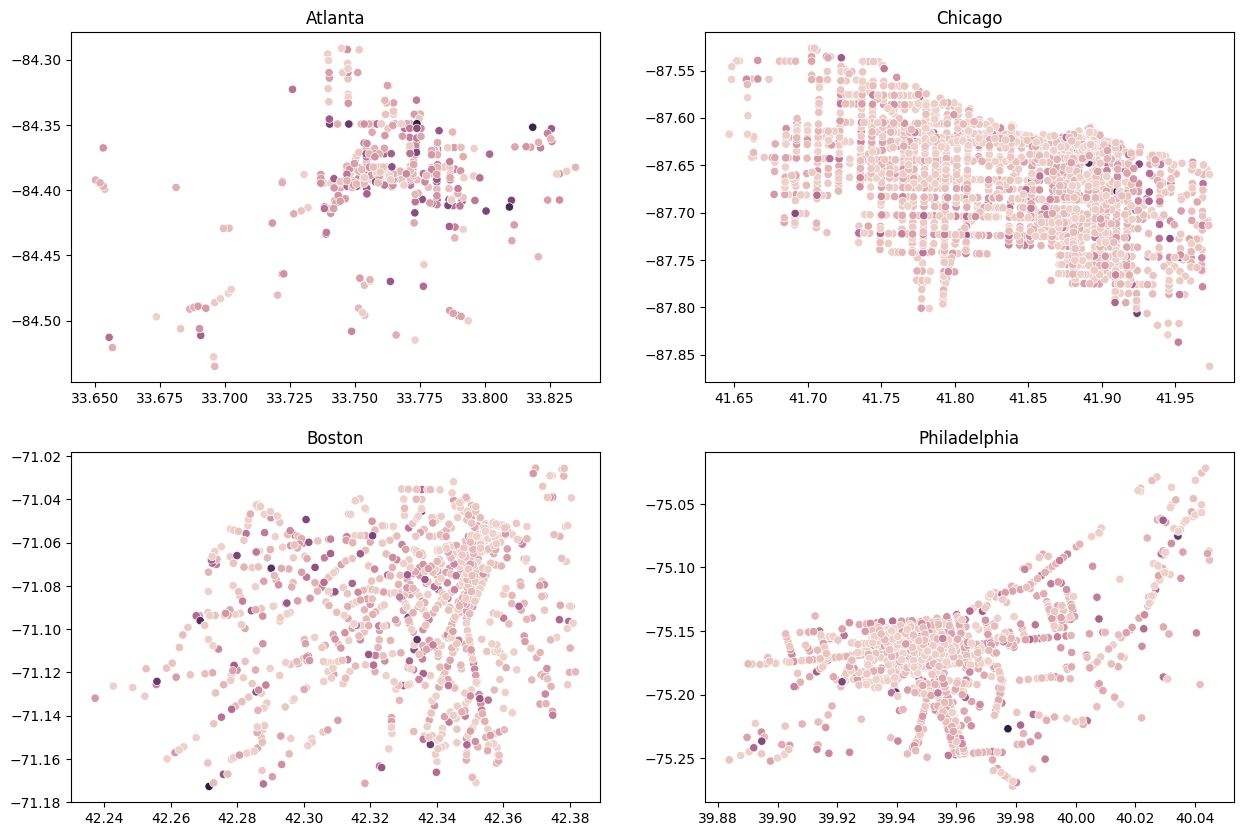

In [ ]:
data = df_train.groupby(['City','IntersectionId','Latitude','Longitude']).agg({'TotalTimeStopped_p50':'mean'}).reset_index()

fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for i,city in enumerate(data['City'].unique().tolist()):
    sns.scatterplot(x='Latitude',y='Longitude',data=data[data['City']==city],hue='TotalTimeStopped_p50',ax=axes[i%2,i//2],legend=False)
    axes[i%2,i//2].set_title(city)
    axes[i%2,i//2].set_xlabel('')
    axes[i%2,i//2].set_ylabel('')

Text(0.5, 0.98, 'Hourly Traffic on Weekdays')

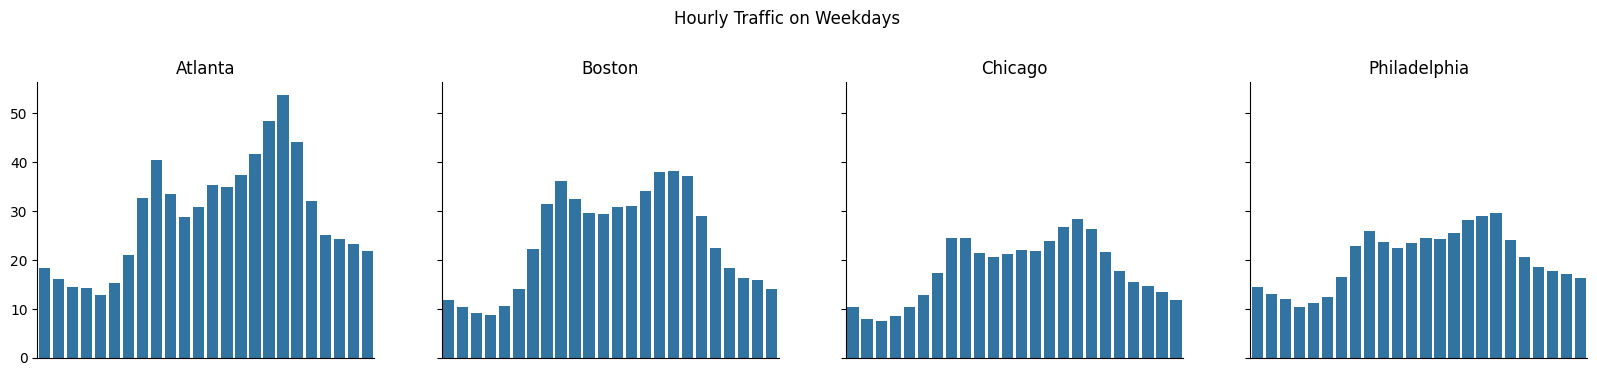

In [ ]:
data = df_train[df_train['Weekend']==0].groupby(['City','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=1, ncols=data['City'].nunique(), figsize=(20,4), sharey=True)
for i,city in enumerate(data['City'].unique()):
    sns.barplot(data=data[data['City']==city] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i], color='C0')
    axes[i].set_ylabel('')
    axes[i].set_title(city)
    axes[i].set_xlabel('')
    axes[i].get_xaxis().set_ticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.subplots_adjust(top=0.8)
fig.suptitle('Hourly Traffic on Weekdays')

Text(0.5, 0.98, 'Hourly Traffic on Weekends')

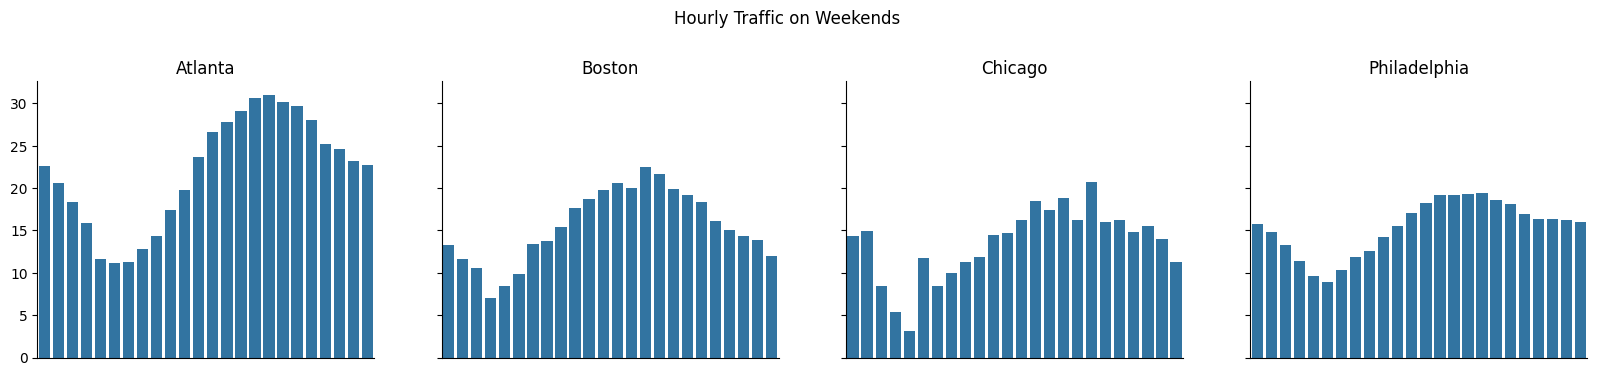

In [ ]:
data = df_train[df_train['Weekend']==1].groupby(['City','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=1, ncols=data['City'].nunique(), figsize=(20,4), sharey=True)
for i,city in enumerate(data['City'].unique()):
    sns.barplot(data=data[data['City']==city] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i], color='C0')
    axes[i].set_ylabel('')
    axes[i].set_title(city)
    axes[i].set_xlabel('')
    axes[i].get_xaxis().set_ticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.subplots_adjust(top=0.8)
fig.suptitle('Hourly Traffic on Weekends')

<Axes: >

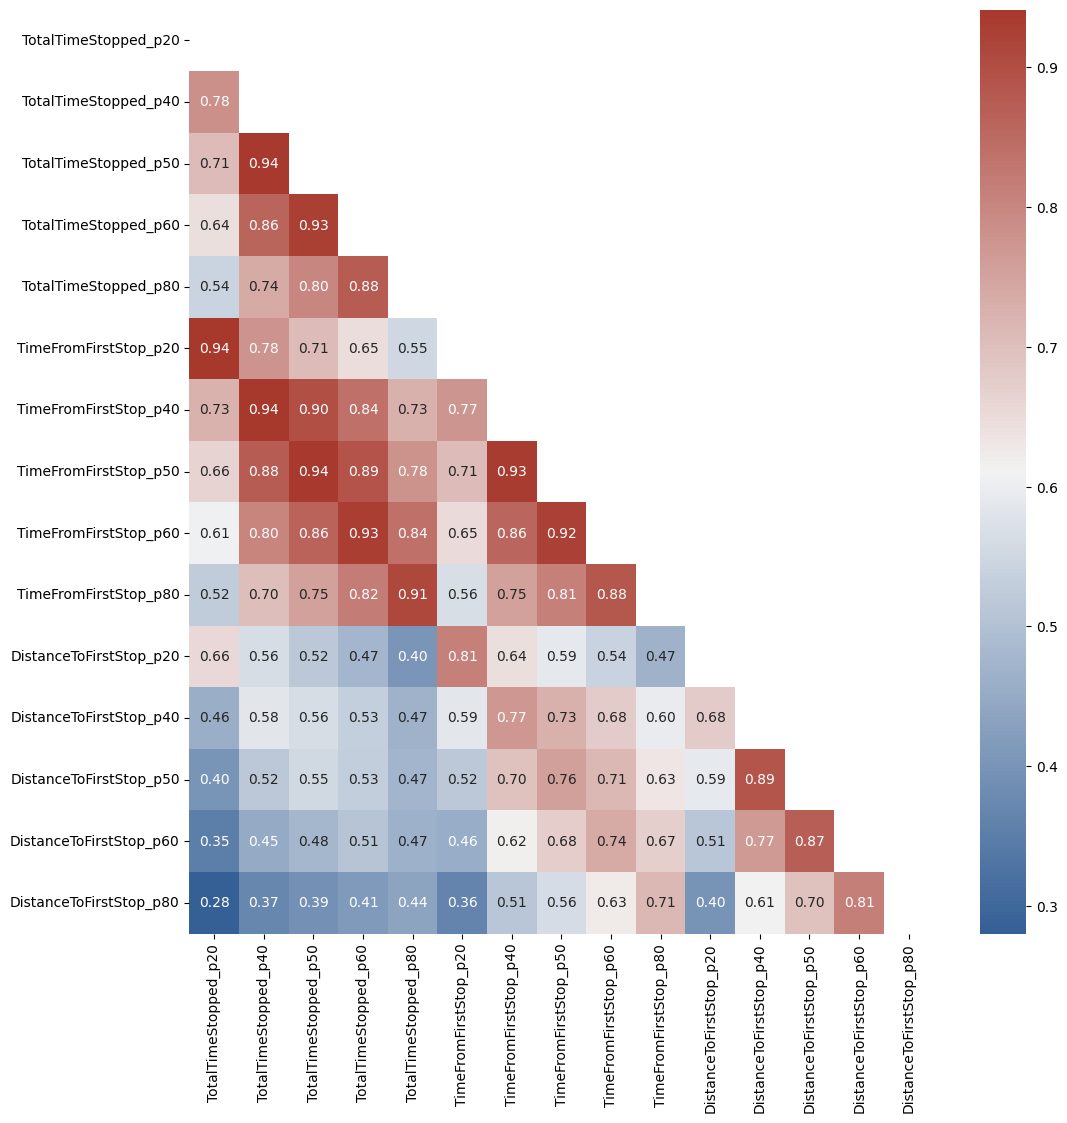

In [ ]:
corr = df_train.iloc[:,12:-1].corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(250,15,s=75,l=40, n=9, center='light', as_cmap=True)
fig = plt.figure(figsize=(12,12))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt='.2f')

<Axes: >

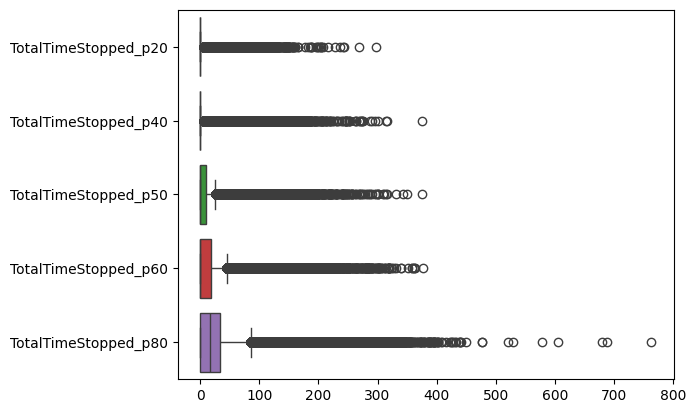

In [ ]:
cols = ['TotalTimeStopped_p20','TotalTimeStopped_p40','TotalTimeStopped_p50',
        'TotalTimeStopped_p60', 'TotalTimeStopped_p80']
sns.boxplot(data=df_train[cols],orient='h')

<Axes: >

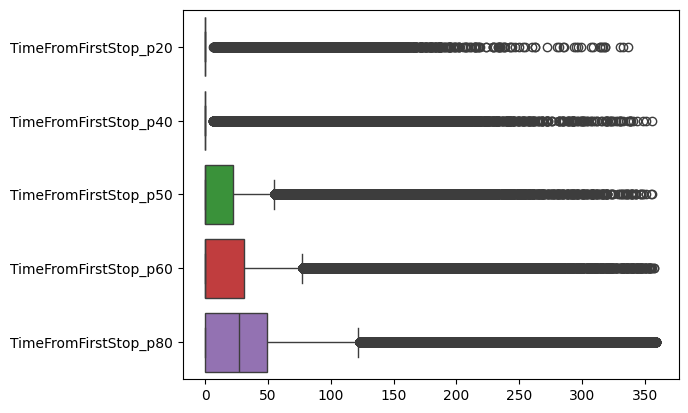

In [ ]:
cols = ['TimeFromFirstStop_p20', 'TimeFromFirstStop_p40','TimeFromFirstStop_p50',
        'TimeFromFirstStop_p60', 'TimeFromFirstStop_p80']
sns.boxplot(data=df_train[cols],orient='h')

<Axes: >

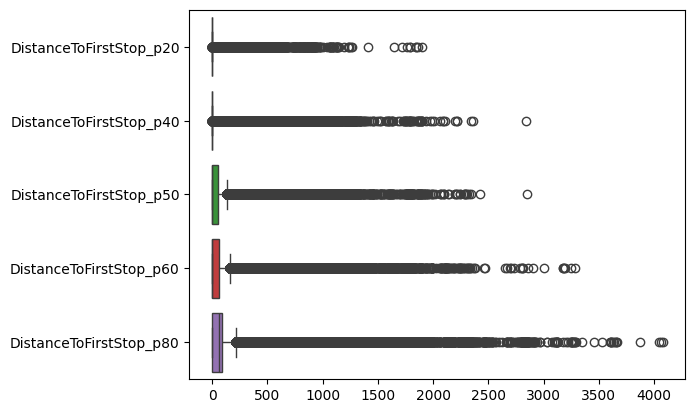

In [ ]:
cols = ['DistanceToFirstStop_p20', 'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80']
sns.boxplot(data=df_train[cols],orient='h')

In [ ]:
str_code = ['Avenue','Street','Boulevard','Road','Highway','Drive','Parkway','Square','Way','Ave','St','Pkwy','Lane','Circle','Place','Other']
str_name = ['Avenue','Street','Boulevard','Road','Highway','Drive','Parkway','Square','Way','Avenue','Street','Parkway','Lane','Circle','Place','Other']

for st in range(len(str_code)):
    df_train.loc[~(df_train['EntryStreetName'].isna()) & (df_train['EntryStreetName'].str.contains(str_code[st])), 'EntryStreetType'] = str_name[st]
    df_train.loc[~(df_train['ExitStreetName'].isna()) & (df_train['ExitStreetName'].str.contains(str_code[st])), 'ExitStreetType'] = str_name[st]
    df_test.loc[~(df_test['EntryStreetName'].isna()) & (df_test['EntryStreetName'].str.contains(str_code[st])), 'EntryStreetType'] = str_name[st]
    df_test.loc[~(df_test['ExitStreetName'].isna()) & (df_test['ExitStreetName'].str.contains(str_code[st])), 'ExitStreetType'] = str_name[st]

df_train['EntryStreetType'].fillna('Other',inplace=True)
df_train['ExitStreetType'].fillna('Other',inplace=True)

df_test['EntryStreetType'].fillna('Other',inplace=True)
df_test['ExitStreetType'].fillna('Other',inplace=True)

In [ ]:
df_train[['City','EntryStreetType','IntersectionId']].drop_duplicates().groupby('EntryStreetType',dropna=False).size().sort_values()

,0
EntryStreetType,
Circle,5
Lane,5
Square,18
Place,20
Way,22
Highway,26
Parkway,90
Other,238
Drive,301


In [ ]:
df_train.groupby('EntryStreetType').agg({'RowId':'count','TotalTimeStopped_p50':'mean','TimeFromFirstStop_p50':'mean','DistanceToFirstStop_p50':'mean','TotalTimeStopped_p80':'mean','TimeFromFirstStop_p80':'mean','DistanceToFirstStop_p80':'mean'}).rename(columns = {'RowId':'Count'}).reset_index().sort_values('TotalTimeStopped_p50', ascending=False)

,EntryStreetType,Count,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50,TotalTimeStopped_p80,TimeFromFirstStop_p80,DistanceToFirstStop_p80
8,Place,402,22.753731,33.179104,46.823134,55.870647,76.253731,114.929104
5,Lane,724,14.364641,26.044199,68.262569,39.870166,65.531768,186.160359
6,Other,15195,13.055216,19.318921,32.385318,33.362159,44.580454,71.306371
12,Way,1932,11.802277,18.112836,34.081211,34.184265,45.327122,73.036491
10,Square,941,10.362380,14.705632,19.013815,24.865037,31.764081,44.647184
4,Highway,5674,10.321995,15.048467,27.484032,29.682940,39.021325,73.099260
2,Circle,944,10.067797,13.141949,18.827119,20.905720,26.241525,36.766843
9,Road,54705,9.181629,14.640983,30.197821,25.642208,37.716662,98.865925
3,Drive,37193,8.780335,13.580996,27.378905,26.184605,37.659640,97.270376
7,Parkway,16882,8.127414,12.407772,26.606172,23.107096,33.015460,84.094758


In [ ]:
heading_map = {'N':1,'NE':2,'E':3,'SE':4,'S':5, 'SW':6, 'W':7, 'NW': 8}

df_train['EntryHeading'] = df_train['EntryHeading'].map(heading_map)
df_train['ExitHeading'] = df_train['ExitHeading'].map(heading_map)
df_test['EntryHeading'] = df_test['EntryHeading'].map(heading_map)
df_test['ExitHeading'] = df_test['ExitHeading'].map(heading_map)

df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType,Temperature,Rainfall
0,1921357,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100
1,1921358,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100
2,1921359,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100
3,1921360,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100
4,1921361,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100


In [ ]:
df_train['TurnType'] = df_train['ExitHeading'] - df_train['EntryHeading']
df_test['TurnType'] = df_test['ExitHeading'] - df_test['EntryHeading']
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType,Temperature,Rainfall,TurnType
0,1921357,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0
1,1921358,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0
2,1921359,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0
3,1921360,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0
4,1921361,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0


In [ ]:
df_train['TurnType'] = df_train['ExitHeading'] - df_train['EntryHeading']
df_test['TurnType'] = df_test['ExitHeading'] - df_test['EntryHeading']
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType,Temperature,Rainfall,TurnType
0,1921357,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0
1,1921358,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0
2,1921359,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0
3,1921360,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0
4,1921361,0,33.791658,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,25.3,100,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df_train[['Hour', 'Month', 'Latitude', 'Longitude']]
y = df_train['TotalTimeStopped_p50']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 8.822253489279479


In [ ]:
new_data = pd.DataFrame({'Hour': [8], 'Month': [1], 'Latitude': [150], 'Longitude': [0]})
predicted_congestion = model.predict(new_data)
print("Predicted Congestion:", predicted_congestion)

Predicted Congestion: [2.95932684]


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import gradio as gr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import plotly.express as px

df = pd.read_csv("train.csv")


X = df[['Hour', 'Month', 'Latitude', 'Longitude']]
y = df['TotalTimeStopped_p50']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)


def predict_congestion(hour, month, lat, lon, city):
    input_df = pd.DataFrame({
        "Hour": [hour],
        "Month": [month],
        "Latitude": [lat],
        "Longitude": [lon]
    })
    prediction = model.predict(input_df)[0]


    city_df = df[df["City"] == city]
    fig = px.scatter_mapbox(
        city_df,
        lat="Latitude",
        lon="Longitude",
        color="TotalTimeStopped_p80",
        size="TotalTimeStopped_p80",
        color_continuous_scale="Portland",
        zoom=10,
        mapbox_style="open-street-map",
        title=f"Congestion Map for {city}"
    )
    return f"🚦 Predicted TotalTimeStopped_p50: {prediction:.2f} seconds", fig


demo = gr.Interface(
    fn=predict_congestion,
    inputs=[
        gr.Slider(0, 23, step=1, label="Hour"),
        gr.Slider(1, 12, step=1, label="Month"),
        gr.Number(label="Latitude"),
        gr.Number(label="Longitude"),
        gr.Dropdown(choices=sorted(df["City"].dropna().unique()), label="City")
    ],
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Plot(label="Congestion Map")
    ],
    title="🚗 Traffic Congestion Predictor",
    description="Enter time and location details to predict traffic congestion and visualize the city's map."
)


demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://117512f807d9af2ca8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
